# Softmax Regression:

Its is basically a mulinomial(mulitclass) logistic regression model. Although it is callled as regression it is a classification algorithm.

### Import all the required packages:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Get the dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Data preprocessing:

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Normalizing the data:

In [4]:
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


### Building the model:

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_accuracy'])

### Training the model:

In [8]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=2000,
                    validation_split=0.3)

Epoch 1/100
21/21 [==============================] - 1s 24ms/step - loss: 2.2716 - sparse_categorical_accuracy: 0.1446 - val_loss: 2.1278 - val_sparse_categorical_accuracy: 0.2521
Epoch 2/100
21/21 [==============================] - 0s 13ms/step - loss: 2.0364 - sparse_categorical_accuracy: 0.3403 - val_loss: 1.9327 - val_sparse_categorical_accuracy: 0.4443
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 1.8640 - sparse_categorical_accuracy: 0.4987 - val_loss: 1.7774 - val_sparse_categorical_accuracy: 0.5696
Epoch 4/100
21/21 [==============================] - 0s 12ms/step - loss: 1.7228 - sparse_categorical_accuracy: 0.5980 - val_loss: 1.6471 - val_sparse_categorical_accuracy: 0.6428
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 1.6034 - sparse_categorical_accuracy: 0.6548 - val_loss: 1.5359 - val_sparse_categorical_accuracy: 0.6824
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 1.5013 - sparse_categorica

21/21 [==============================] - 0s 13ms/step - loss: 0.5047 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.4887 - val_sparse_categorical_accuracy: 0.8759
Epoch 92/100
21/21 [==============================] - 0s 13ms/step - loss: 0.5030 - sparse_categorical_accuracy: 0.8732 - val_loss: 0.4872 - val_sparse_categorical_accuracy: 0.8759
Epoch 93/100
21/21 [==============================] - 0s 14ms/step - loss: 0.5015 - sparse_categorical_accuracy: 0.8735 - val_loss: 0.4857 - val_sparse_categorical_accuracy: 0.8762
Epoch 94/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4999 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.4842 - val_sparse_categorical_accuracy: 0.8764
Epoch 95/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4984 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.4828 - val_sparse_categorical_accuracy: 0.8766
Epoch 96/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4969 - sparse_categorical_accur

### Plotting accuracy and loss:

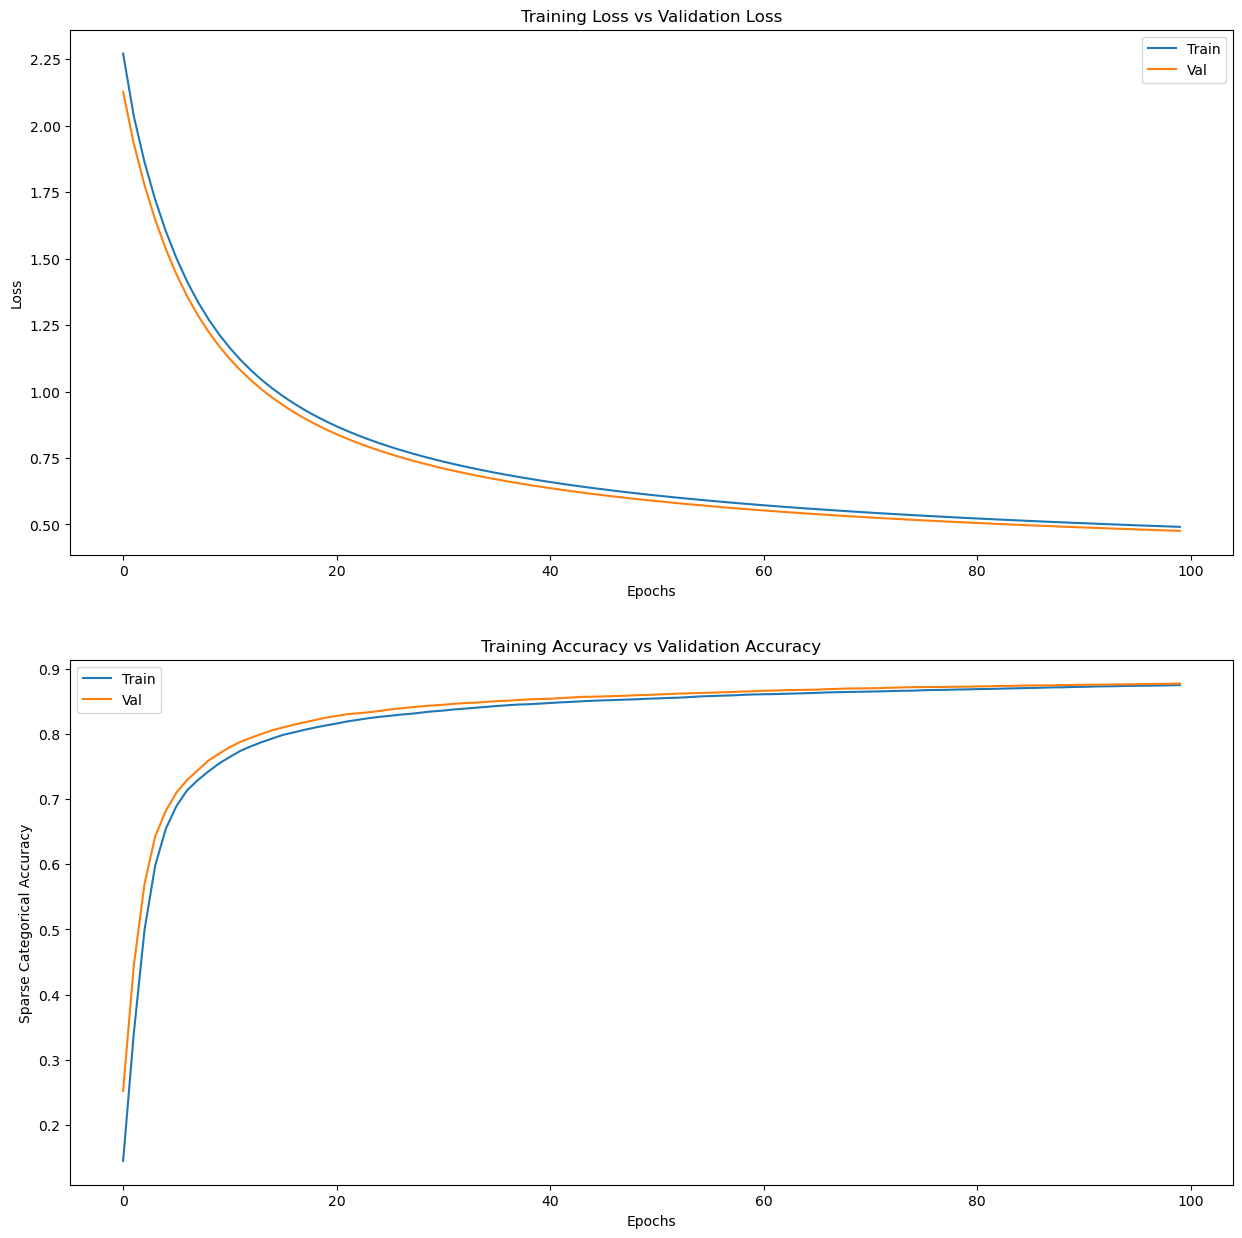

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['sparse_categorical_accuracy'])
axs[1].plot(history.history['val_sparse_categorical_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Sparse Categorical Accuracy')
axs[1].legend(['Train', 'Val'])

### Evaluating the model:

In [17]:
result = model.evaluate(x_test, y_test)
print("Loss: {}, Sparse-categorical-accuracy: {}".format(result[0], result[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4508 - sparse_categorical_accuracy: 0.8880
Loss: 0.4507737159729004, Sparse-categorical-accuracy: 0.8880000114440918


### Model Report (optional):

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, (tf.argmax(model.predict(x_test), axis=1)).numpy()))

313/313 [==============================] - 0s 923us/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.93      0.97      0.95      1135
           2       0.90      0.84      0.87      1032
           3       0.88      0.88      0.88      1010
           4       0.88      0.90      0.89       982
           5       0.88      0.79      0.83       892
           6       0.90      0.93      0.91       958
           7       0.90      0.88      0.89      1028
           8       0.83      0.84      0.84       974
           9       0.85      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

